## Import Libraries

In [1]:
import numpy
import math
from math import sin, cos
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

## Problem Statement

Suppose you wanted to participate in a paper-airplane competition, and you want to use what you know about the phugoid model to improve your chances. For a given value of L/D that you can obtain in your design, you want to know what is the best initial velocity and launch angle to fly the longest distance from a given height.

Using the phugoid model, write a new code to analyze the flight of a paper airplane, with the following conditions:
Assume L/D of 5.0 (a value close to measurements in Feng et al. 2009)

For the trim velocity, let's take an average value of 4.9 m/s.
Find a combination of launch angle and velocity that gives the best distance.
Think about how you will know when the flight needs to stop ... this will influence how you organize the code.
How can you check if your answer is realistic?

## Method

In this Notebook, I used different angles to examine the flight path, while keeping the velocity constant. I used the 1st order Euler Method to discretize the equations

In [2]:
# model parameters:
g = 9.81     # gravity in m s^{-2}
v_t = 4.9   # trim velocity in m s^{-1}   
C_D = 1/5  # drag coefficient --- or D/L if C_L=1
C_L = 1   # for convenience, use C_L = 1

### set initial conditions ###

x0 = 0.0     # horizotal position is arbitrary
y0 = 2.0  # initial altitude

v0 = 6.5 #m/s, arbitrary
#----------------------------------------------

In [3]:
#create an array of launch angles:

theta_max = 10.*(math.pi/180.)
theta_min = -10.*(math.pi/180.)
interval = 5
NN = int((theta_max/(math.pi/180.) - theta_min/(math.pi/180.))/interval + 1)

theta0 = numpy.linspace(theta_min, theta_max, NN)

In [4]:
print(theta0[:])

[-0.17453293 -0.08726646  0.          0.08726646  0.17453293]


## Define Functions

In [5]:
def f(u):
    """Returns the right-hand side of the phugoid system of equations.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta) - C_D/C_L*g/v_t**2*v**2,
                      -g*cos(theta)/v + g/v_t**2*v,
                      v*cos(theta),
                      v*sin(theta)])

In [6]:
def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

## Time Discretization

In [7]:
# Create Time Discretization

T = 15                              # final time in seconds
dt = 0.1                           # time increment
N = int(T/dt) + 1                  # number of time-steps
t = numpy.linspace(0, T, N)      # time discretization

In [8]:
print(N)

151


## Initialize and Solve

In [9]:
u_1 = numpy.empty((N, 4))
u_2 = numpy.empty((N, 4))
u_3 = numpy.empty((N, 4))
u_4 = numpy.empty((N, 4))
u_5 = numpy.empty((N, 4))

u_1[0] = numpy.array([v0, theta0[0], x0, y0])
u_2[0] = numpy.array([v0, theta0[1], x0, y0])
u_3[0] = numpy.array([v0, theta0[2], x0, y0])
u_4[0] = numpy.array([v0, theta0[3], x0, y0])
u_5[0] = numpy.array([v0, theta0[4], x0, y0])

# time loop - Euler method
for n in range(N-1):
    
    u_1[n+1] = euler_step(u_1[n], f, dt)
    u_2[n+1] = euler_step(u_2[n], f, dt)
    u_3[n+1] = euler_step(u_3[n], f, dt)
    u_4[n+1] = euler_step(u_4[n], f, dt)
    u_5[n+1] = euler_step(u_5[n], f, dt)

In [10]:
#Get Trajectories

# get the glider's position with respect to the time
x_1 = u_1[:,2]
y_1 = u_1[:,3]

x_2 = u_2[:,2]
y_2 = u_2[:,3]

x_3 = u_3[:,2]
y_3 = u_3[:,3]

x_4 = u_4[:,2]
y_4 = u_4[:,3]

x_5 = u_5[:,2]
y_5 = u_5[:,3]

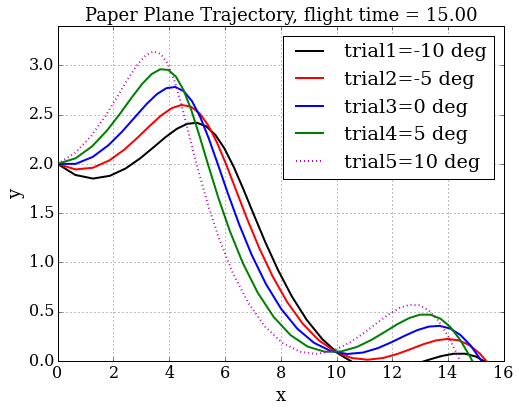

In [11]:
# visualization of the path
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.xlim(0,16)
pyplot.ylim(0,3.4)
pyplot.title('Paper Plane Trajectory, flight time = %.2f' % T, fontsize=18)
pyplot.plot(x_1,y_1, color='k', lw=2)
pyplot.plot(x_2,y_2, color='r', lw=2)
pyplot.plot(x_3,y_3, color='b', lw=2)
pyplot.plot(x_4,y_4, color='g', lw=2)
pyplot.plot(x_5,y_5, color='m', lw=2, linestyle = ':')
pyplot.legend(['trial1=-10 deg','trial2=-5 deg', 'trial3=0 deg', 'trial4=5 deg', 'trial5=10 deg']);

In [12]:
numpy.where(u_1[:,3]<0)

(array([ 23,  24,  25,  26,  27,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
         54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
         67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
         80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
        132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
        145, 146, 147, 148, 149, 150]),)

In [13]:
numpy.where(u_3[:,3]<0)

(array([ 35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
         48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
         61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
         74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
         87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
        100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
        139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150]),)

In [14]:
print('a -10 deg launch angle gives a max distance of about', x_1[22], 'meters' )

a -10 deg launch angle gives a max distance of about 10.0655843299 meters


In [15]:
print('a 0 deg launch angle gives a max distance of about', x_3[34], 'meters' )

a 0 deg launch angle gives a max distance of about 15.1727831949 meters


### From the graph above, the optimal launch angle to maximize distance travelled appears to be a negative angle less than 10 degrees. To Narrow the angle, look at launch angles between 0 and -9 degrees.

In [16]:
#create an array of launch angles:

theta_max = 0*(math.pi/180.)
theta_min = -9.*(math.pi/180.)
interval = 1
NN = int((theta_max/(math.pi/180.) - theta_min/(math.pi/180.))/interval + 1)

theta0 = numpy.linspace(theta_min, theta_max, NN)

In [17]:
print(theta0 )

[-0.15707963 -0.13962634 -0.12217305 -0.10471976 -0.08726646 -0.06981317
 -0.05235988 -0.03490659 -0.01745329  0.        ]


In [18]:
u = numpy.empty((N, 4))

u_values = numpy.empty_like([u,u,u,u,u,u,u,u,u,u], dtype=numpy.ndarray)


for j in range(NN):
    
    u[0] = numpy.array([v0, theta0[j], x0, y0])
    
    for i in range(N-1):
        #u[0] = numpy.array([v0, theta0[j], x0, y0])
        u[i+1] = euler_step(u[i], f, dt)

    #store values of u related to each angle
    u_values[j] = u  
        

In [19]:
x1, y1 = u_values[0,:,2], u_values[0,:,3]
x2, y2 = u_values[1,:,2], u_values[1,:,3]
x3, y3 = u_values[2,:,2], u_values[2,:,3]
x4, y4 = u_values[3,:,2], u_values[3,:,3]
x5, y5 = u_values[4,:,2], u_values[4,:,3]

x6, y6 = u_values[5,:,2], u_values[5,:,3]
x7, y7 = u_values[6,:,2], u_values[6,:,3]
x8, y8 = u_values[7,:,2], u_values[7,:,3]
x9, y9 = u_values[8,:,2], u_values[8,:,3]
x10, y10 = u_values[9,:,2], u_values[9,:,3]

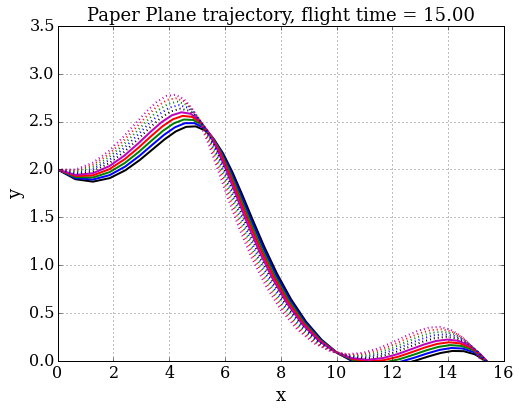

In [20]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.ylim(0,3.5)
pyplot.xlim(0,16)
pyplot.title('Paper Plane trajectory, flight time = %.2f' % T, fontsize=18)
pyplot.plot(x1,y1, 'k-', lw=2)
pyplot.plot(x2,y2, 'b-', lw=2)
pyplot.plot(x3,y3, 'g-', lw=2)
pyplot.plot(x4,y4, 'r-', lw=2)
pyplot.plot(x5,y5, 'm-', lw=2)
pyplot.plot(x6,y6, 'k:', lw=2)
pyplot.plot(x7,y7, 'b:', lw=2)
pyplot.plot(x8,y8, 'g:', lw=2)
pyplot.plot(x9,y9, 'r:', lw=2)
pyplot.plot(x10,y10, 'm:', lw=2)
#pyplot.legend(['trial1=-9 deg','trial2=-8 deg', 'trial3=-7 deg','trial4=-6 deg', 'trial5=-5 deg'\
              #'trial6=-4 deg','trial7=-3 deg', 'trial8=-2 deg','trial9=-1 deg', 'trial10=0 deg']);

### Some of these launch angles appear to give a max distance between 10 and 12 meters, and we can discard these!

In [21]:
y1[22], y2[22], y3[23], y4[23], y5[33], y6[33], y7[33], y8[33], y9[34], y10[34]

(0.07743221448057386,
 0.08187153994666652,
 0.008384839963478802,
 0.01872191916442946,
 0.07727193730991773,
 0.09425589165678348,
 0.11052205326537115,
 0.1260711561248103,
 -0.00021030107883751592,
 0.008916325317361168)

In [22]:
x1[22], x2[22], x3[23], x4[23], x5[33], x6[33], x7[33], x8[33], x9[33], x10[34]

(10.047231216375065,
 10.027031588141844,
 10.591786097741887,
 10.568502244083623,
 15.124882381726673,
 15.066111237841417,
 15.00492057656014,
 14.941291615089359,
 14.875206881861903,
 15.172783194898962)

### Based on these results, we can exclude launch angles of -9, -8, -7, and -6 degrees

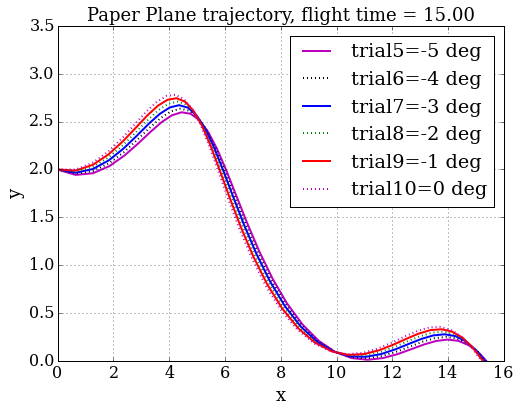

In [23]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.ylim(0,3.5)
pyplot.xlim(0,16)
pyplot.title('Paper Plane trajectory, flight time = %.2f' % T, fontsize=18)

pyplot.plot(x5,y5, 'm-', lw=2)
pyplot.plot(x6,y6, 'k:', lw=2)
pyplot.plot(x7,y7, 'b-', lw=2)
pyplot.plot(x8,y8, 'g:', lw=2)
pyplot.plot(x9,y9, 'r-', lw=2)
pyplot.plot(x10,y10, 'm:', lw=2)
pyplot.legend(['trial5=-5 deg','trial6=-4 deg','trial7=-3 deg', 'trial8=-2 deg','trial9=-1 deg', 'trial10=0 deg']);

### Based on the initial conditions provided at the beginning of this notebook, the optimal launch angle for maximum distance is between -5 and 0 degrees.